Nguyễn Thái Nguyên - 2274802010587

# **Một số thuật toán cơ bản của học máy**

## 1. Linear Regression

Biết: hồi quy tuyến tính là dự đoán giá trị liên tục dựa trên một hoặc nhiều biến độc lập


In [94]:
# Sử dụng hồi quy tuyến tính để dự đoán giá nhà thông qua bộ dữ liệu fetch california
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

cali = fetch_california_housing()
X = pd.DataFrame(cali.data, columns = cali.feature_names)
y = pd.Series(cali.target)

In [18]:
# # chia tập dữ liệu thành 80% huấn luyện và 20% kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Kiểm tra kích thước của tập dữ liệu sau khi chia
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

# # Khởi tạo và huấn luyện mô hình Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# # Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# # Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Train set: (16512, 8), Test set: (4128, 8)
Mean Squared Error: 0.5558915986952441
R² Score: 0.575787706032451


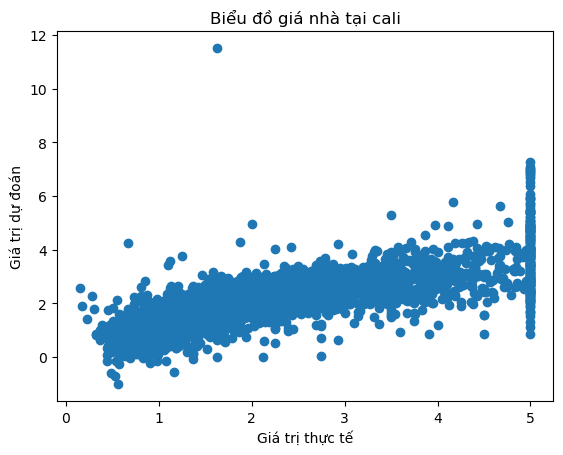

In [20]:
# Vẽ biểu đồ
plt.scatter(y_test, y_pred)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title("Biểu đồ giá nhà tại cali")
plt.show()

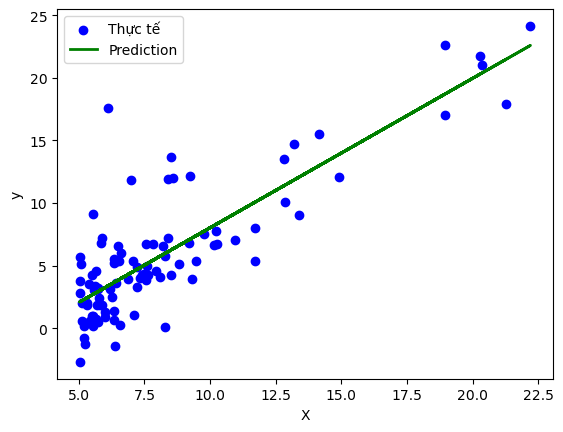

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Bước 1: Đọc dữ liệu từ file
data = pd.read_csv('lab1data1.txt', header=None, names= ['Feature', 'ExamScore'])

X = data[['Feature']]
y = data[['ExamScore']]

# Bước 3: Huấn luyện mô hình Linear Regression
model = LinearRegression()
model.fit(X, y)

# Bước 4: Dự đoán trên tập kiểm tra
y_pred = model.predict(X)

# Vẽ scatter plot dữ liệu thực tế
plt.scatter(X, y, color='blue', label='Thực tế')
# Vẽ đường hồi quy tuyến tính
plt.plot(X, y_pred, color='green', linewidth=2, label='Prediction')
# Thêm tiêu đề và nhãn
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


## 2. Hồi quy Logistic

Là phân loại nhị phân hoặc đa lớp dựa trên các đặc trưng

Accuracy: 0.9650

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



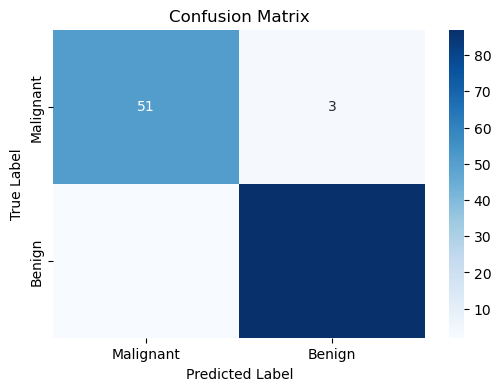

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.datasets import load_breast_cancer

# **1. Load dữ liệu**
data = load_breast_cancer()
X = data.data  # Các đặc trưng
y = data.target  # Nhãn (0: Ác tính, 1: Lành tính)

# **2. Chia tập dữ liệu thành tập huấn luyện (75%) và tập kiểm tra (25%)**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# **3. Xây dựng và huấn luyện mô hình Logistic Regression**
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# **4. Dự đoán trên tập kiểm tra**
y_pred = model.predict(X_test)

# **5. Đánh giá mô hình**
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# **6. Trực quan hóa ma trận nhầm lẫn**
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Phân cụm - nhóm các đối tượng tương đồng mà không cần gán nhãn

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data # có 4 đặc trưng
y = iris.target # nhãn để so sánh

# Áp dụng K-Means với số cụm là 3
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(X)
y_Kmeans = kmeans.predict(X)

# Sử dụng PCA để giảm chiều ( giải thích ở BTVN)
pca = PCA(n_components = 2) # Giảm xuống còn 2 chiều
X_pca = pca.fit_transform(X)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


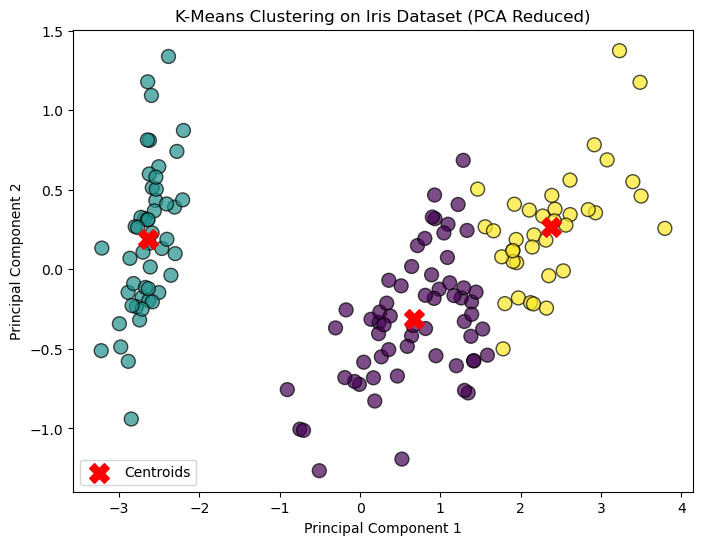

In [5]:
# Trực quan hóa kết quả:
import matplotlib.pyplot as plt

# Vẽ kết quả phân cụm của K-Means
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_Kmeans, cmap='viridis', edgecolors='k', s=100, alpha=0.7)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], 
            pca.transform(kmeans.cluster_centers_)[:, 1], 
            c='red', marker='X', s=200, label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on Iris Dataset (PCA Reduced)')
plt.legend()
plt.show()

In [7]:
# PCA
# PCA (Principal Component Analysis – Phân tích thành phần chính) là một phương pháp giảm chiều dữ liệu tuyến tính nhằm trích xuất những đặc trưng quan trọng nhất từ một tập dữ liệu có nhiều chiều.
# Mục tiêu của PCA là:
    # Giảm số chiều của dữ liệu mà vẫn giữ được nhiều thông tin nhất có thể.
    # Tạo ra các đặc trưng mới (các thành phần chính - Principal Components) không phụ thuộc lẫn nhau.
    # Loại bỏ các đặc trưng dư thừa, giảm nhiễu, tăng tốc độ tính toán và giúp trực quan hóa dữ liệu tốt hơn.
# Cách hoạt động của PCA: PCA chuyển đổi dữ liệu gốc từ không gian 𝑛  chiều sang không gian mới có ít chiều hơn, dựa trên phương sai của dữ liệu.

## BTVN 

### 1. Cho tập dữ liệu dự đoán bệnh tim bằng hồi quy logistic

In [15]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("heart.csv")

# Kiểm tra thông tin dữ liệu
print(df.info())

# Xem 5 dòng đầu tiên
print(df.head())

df = df.dropna()

scaler = StandardScaler()
X = df.drop(columns=['target'])  # Loại bỏ cột mục tiêu
X_scaled = scaler.fit_transform(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0    

Độ chính xác: 0.80
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



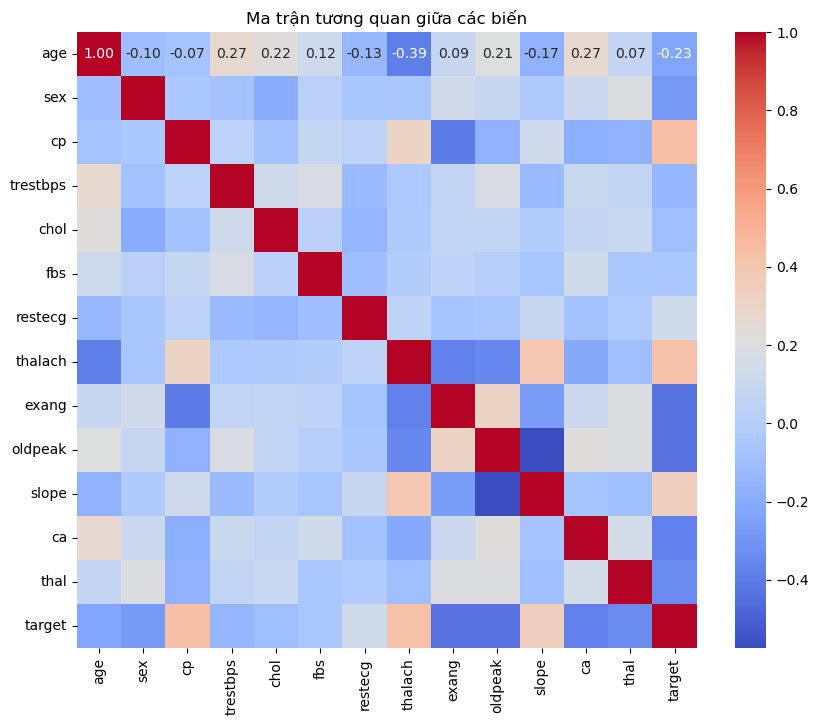

In [17]:
# chia tập dữ liệu
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và kiểm tra (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['target'], test_size=0.2, random_state=42)

# xây dựng mô hình
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Khởi tạo mô hình
model = LogisticRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
# Độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác: {accuracy:.2f}")

# Báo cáo phân loại chi tiết
print(classification_report(y_test, y_pred))

#trực quan hóa
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan giữa các biến")
plt.show()

### 2. Ứng dụng thuật toán phân cumj Kmeans cho tập dữ liệu customers data, "you can get in kaggle"

In [31]:
import pandas as pd

# Đọc dữ liệu
data = pd.read_csv("Mall_Customers.csv")

# Xem 5 dòng đầu tiên
print(df.head())
print(df.columns)


   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40
Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')


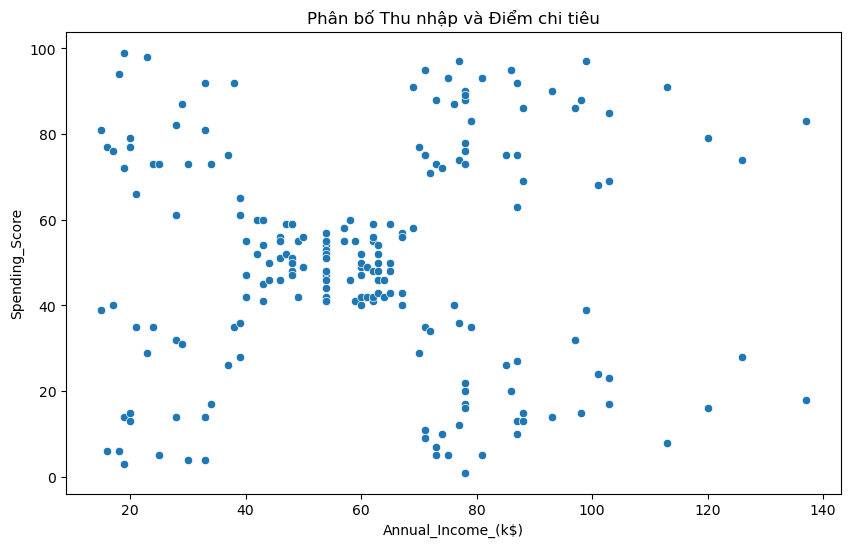

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ phân bố thu nhập và điểm chi tiêu
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual_Income_(k$)'], y=df['Spending_Score'])
plt.xlabel("Annual_Income_(k$)")
plt.ylabel("Spending_Score")
plt.title("Phân bố Thu nhập và Điểm chi tiêu")
plt.show()

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\A

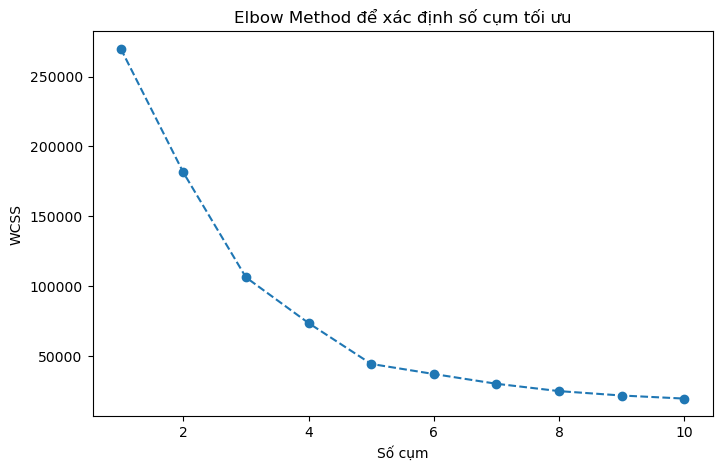

In [39]:
from sklearn.cluster import KMeans

# Chọn hai đặc trưng quan trọng
X = data[['Annual_Income_(k$)', 'Spending_Score']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Số cụm")
plt.ylabel("WCSS")
plt.title("Elbow Method để xác định số cụm tối ưu")
plt.show()

In [41]:
# Áp dụng K-Means với số cụm K=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Xem kết quả phân cụm
print(df.head())


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score  Cluster
0           1    Male   19                  15              39        2
1           2    Male   21                  15              81        3
2           3  Female   20                  16               6        2
3           4  Female   23                  16              77        3
4           5  Female   31                  17              40        2


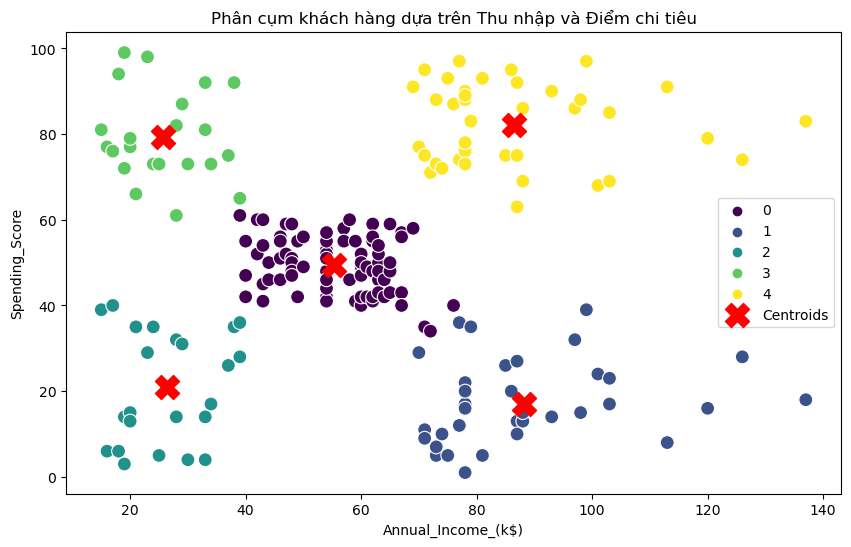

In [45]:
# Vẽ phân cụm
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual_Income_(k$)'], y=df['Spending_Score'], hue=df['Cluster'], palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.xlabel("Annual_Income_(k$)")
plt.ylabel("Spending_Score")
plt.title("Phân cụm khách hàng dựa trên Thu nhập và Điểm chi tiêu")
plt.legend()
plt.show()


### 3. Tìm hiểu về ma trận nhầm lẫn và đánh giá độ chính xác trên các bài tập lớn

In [49]:
#Là một phương pháp đánh giá kết quả của những bài toán phân loại với việc xem xét cả những chỉ số về độ chính xác và độ bao quát của các dự đoán cho từng lớp. Một confusion matrix gồm 4 chỉ số sau đối với mỗi lớp phân loại:
    # TP (True Positive): Số lượng dự đoán chính xác
    # TN (True Negative): Số lương dự đoán chính xác một cách gián tiếp.
    # FP (False Positive - Type 1 Error): Số lượng các dự đoán sai lệch.
    # FN (False Negative - Type 2 Error): Số lượng các dự đoán sai lệch một cách gián tiếp.
# Precision: Trong tất cả các dự đoán Positive được đưa ra, bao nhiêu dự đoán là chính xác? Chỉ số này được tính theo công thức:
    # Precision = TP / TP + FP
# Recall: Trong tất cả các trường hợp Positive, bao nhiêu trường hợp đã được dự đoán chính xác? Chỉ số này được tính theo công thức:
    # Recall = TP / TP + FN